In [116]:
'''Before, we used the 'train_test_split' function to perform one experimental run
However, to use just one split often biased (you could ask: what qualifies a data point to be in the training or test set?)
so running multiple instances using your model but with different sets each run is the key idea in crossvalidation
In the newest version of scikit, it is sufficient to just call 'cross_val_score' with the desired number of folds. 
It returns already the accuracy when trained on each fold'''

# So just import it instead of 'train_test_split'
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Get some data, use X for the datapoints and y for the label (or rename but then change accordingly)
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml

dataset1 = load_wine()
dataset2_data, dataset2_target = fetch_openml('mnist_784', version=1, return_X_y=True)
dataset2_data = dataset2_data[:2000]
dataset2_target = dataset2_target[:2000]
dataset2_data = dataset2_data / 255

# Define a classifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
treeClassifier = tree.DecisionTreeClassifier(min_samples_split=4)
mlpClassifier = MLPClassifier(hidden_layer_sizes=(50,50), learning_rate='adaptive', max_iter=10, early_stopping=True)

# Here, the k-fold crossvalidation starts with k=10; you do not pass separated train and test sets anymore 
scores1tree = cross_val_score(treeClassifier, dataset1.data, dataset1.target, cv=10, scoring='accuracy')
scores2tree = cross_val_score(treeClassifier, dataset2_data, dataset2_target, cv=10, scoring='accuracy')

scores1mlp = cross_val_score(mlpClassifier, dataset1.data, dataset1.target, cv=10, scoring='accuracy')
scores2mlp = cross_val_score(mlpClassifier, dataset2_data, dataset2_target, cv=10, scoring='accuracy')
# Prints all scores of all folds
print(scores1)
print(scores2)

# Prints the average, this is actually what you want and report in a paper
print("Wine dataset TREE: " + str(scores1.mean()))
print("MNIST dataset TREE: " + str(scores2.mean()))


/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

[0.26315789 0.38888889 0.33333333 0.27777778 0.27777778 0.33333333
 0.38888889 0.38888889 0.41176471 0.4375    ]
[0.31578947 0.27777778 0.38888889 0.33333333 0.38888889 0.38888889
 0.38888889 0.38888889 0.23529412 0.4375    ]
Wine dataset TREE: 0.3501311489508084
MNIST dataset TREE: 0.3544139146886825


/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [117]:
'''Okay, now you hopefully got a refresh on k-fold crossvalidation and how to use it practically. This technique does not
only cope with small datasets but is especially used to find out the best hyperparameter for a model, e.g. the learning
rate, say 'eta', in a neural network. Here is how you can do it, but be aware that you can't just run it as it is: '''
from sklearn.neural_network import MLPClassifier

# if you use integers
#param_range = list(range(1, 10)) # remember the range function from the first tutorial?

#if you use floats, e.g. for the learning rate 
eta=[(i+1)/10.0 for i in range(11)] 
print(eta)

fold_scores1 = []
for k in param_range:
    mlp_example = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10, early_stopping=True, learning_rate_init=k) 
    scores1 = cross_val_score(mlp_example, X, y, cv=10, scoring='accuracy')
    fold_scores1.append(scores1.mean())
print("Wine dataset: " + str(fold_scores1))

fold_scores2 = []
for k in param_range:
    mlp_example = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10, early_stopping=True, learning_rate_init=k) 
    scores2 = cross_val_score(mlp_example, X, y, cv=10, scoring='accuracy')
    fold_scores2.append(scores2.mean())
print("MNIST dataset: " + str(fold_scores2))

/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]


/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

Wine dataset: [0.36647101823185413, 0.3589761781905745, 0.37049578603371175, 0.33507911936704504, 0.31442853457172343, 0.36094986240110083, 0.37703173374613, 0.3589761781905745, 0.32969986240110083]


/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

MNIST dataset: [0.3279089267285861, 0.365593825249398, 0.3501311489508084, 0.3423095115239078, 0.3471706226350189, 0.38814284485724115, 0.3538291193670451, 0.37703173374613, 0.37703173374613]


/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/henrikpeters/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimi

Text(0, 0.5, 'fold accuracy')

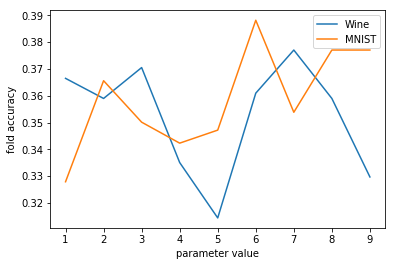

In [118]:
# It is nicer to plot it the parameter range (here for example for eta, the learning rate, but change to your needs); 
# refreshes also your skills from the 2nd tutorial :)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(param_range, fold_scores1, label="Wine")
plt.plot(param_range, fold_scores2, label="MNIST")
plt.legend()
plt.xlabel('parameter value')
plt.ylabel('fold accuracy')